# Goal

Let's dive into VELMA's and baseline predictions of which tweets have been written by users.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Load ground-truth valuations file
import pandas as pd

df = pd.read_csv('../data/tweets/tweets.csv')

In [3]:
# Load predictions
from pathlib import Path
import pickle
import numpy as np

approaches = ['embs', 'nli_relative', 'distilgpt2', 'gpt-neo-1.3B']
users = ['nabla_theta', 'slatestarcodex', 'stuhlmueller', 'ESYudkowsky', 'ben_j_todd',
         'ch402', 'willmacaskill', 'hardmaru', 'kenneth0stanley', 'RichardMCNgo']
preds = {}

for approach in approaches:
    approach_data = []
    
    for user in users:
        artifact_path = Path('..') / 'data' / 'tweets_artifacts' / approach / (user + '.pkl')
        user_approach_data = pickle.load(open(artifact_path, 'rb'))
        approach_data += user_approach_data
       
    preds[approach] = approach_data

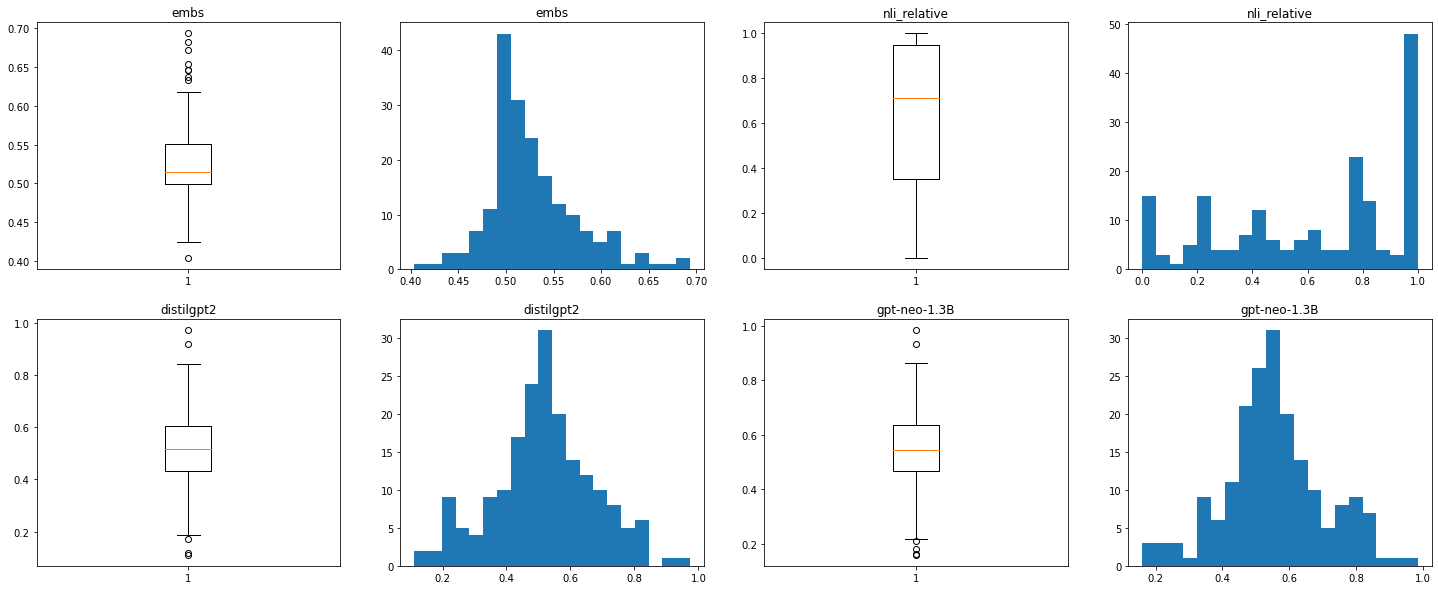

In [4]:
# Plot correlations
import matplotlib.pyplot as plt
from src.util import softmax

plt.figure(figsize=(25, 10))

for id, approach in enumerate(approaches):
    if approach in ['distilgpt2', 'gpt-neo-1.3B']:
        preds[approach] = [[softmax([f['conditionals'][0], f['conditionals'][1]], 0.5)[0] for f in e] for e in preds[approach]]
    means = [np.mean(e) for e in preds[approach]]
    
    plt.subplot(2, 4, 2 * id + 1)
    plt.title(approach)
    plt.boxplot(means)

    plt.subplot(2, 4, 2 * id + 2)
    plt.title(approach)
    plt.hist(means, bins=20)

plt.show()

In [5]:
for id, approach in enumerate(approaches):
    y_true = [1] * len(preds[approach])
    y_pred = [int(np.mean(e) > 0.5) for e in preds[approach]]
    
    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    print(approach)

    # Accuracy
    from sklearn.metrics import accuracy_score
    print('acc:', round(accuracy_score(y_true, y_pred), 2))

embs
acc: 0.72
nli_relative
acc: 0.62
distilgpt2
acc: 0.55
gpt-neo-1.3B
acc: 0.67


In [6]:
from sentence_transformers import SentenceTransformer

emb_model = SentenceTransformer('all-MiniLM-L6-v2')

In [7]:
from src.util import filter
from tqdm import tqdm

users = ['nabla_theta', 'slatestarcodex', 'stuhlmueller', 'ESYudkowsky', 'ben_j_todd',
         'ch402', 'willmacaskill', 'hardmaru', 'kenneth0stanley', 'RichardMCNgo']

mean_dists = []

for user in tqdm(users):
    claim_tweets = df[df['username'] == user][pd.notna(
        df['extracted_claim'])][pd.notna(df['negated_claim'])]

    for idx, row in claim_tweets.iterrows():
        other_tweets = df[df['username'] ==
                          user][df['extracted_claim'] != row['extracted_claim']]['tweet'].values

        selection = filter(
            row['extracted_claim'], other_tweets, emb_model, top_k=5, return_scores=True)
        mean_dists += [np.mean([e[1] for e in selection])]

mean_dists

  0%|          | 0/10 [00:00<?, ?it/s]/tmp/ipykernel_11447/1731652268.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  claim_tweets = df[df['username'] == user][pd.notna(
/tmp/ipykernel_11447/1731652268.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other_tweets = df[df['username'] ==


Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

 10%|█         | 1/10 [02:13<20:03, 133.71s/it]

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

 20%|██        | 2/10 [02:21<07:57, 59.73s/it] 

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

 30%|███       | 3/10 [03:02<05:58, 51.27s/it]

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

 40%|████      | 4/10 [17:59<38:30, 385.03s/it]

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

 50%|█████     | 5/10 [21:29<26:49, 321.84s/it]

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

 60%|██████    | 6/10 [29:41<25:18, 379.70s/it]

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

 70%|███████   | 7/10 [30:15<13:19, 266.60s/it]

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

 80%|████████  | 8/10 [51:39<19:41, 590.54s/it]

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

 90%|█████████ | 9/10 [52:36<07:03, 423.86s/it]

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

100%|██████████| 10/10 [1:11:15<00:00, 427.59s/it]

Ignored unknown kwarg option direction


[0.4164923429489136,
 0.44736064076423643,
 0.37276526391506193,
 0.2721046030521393,
 0.3758114367723465,
 0.31847111880779266,
 0.4572749525308609,
 0.24690358936786652,
 0.35076768696308136,
 0.3073446720838547,
 0.4495905160903931,
 0.4053774356842041,
 0.34091581404209137,
 0.41488713920116427,
 0.33323454558849336,
 0.505084428191185,
 0.24777248203754426,
 0.33843720257282256,
 0.32802089750766755,
 0.5241247445344925,
 0.4178835153579712,
 0.4058061301708221,
 0.3402158319950104,
 0.3036178648471832,
 0.30485903322696684,
 0.2838707104325294,
 0.23238192796707152,
 0.21707278043031691,
 0.23760630637407304,
 0.1848994866013527,
 0.1920537307858467,
 0.14761837497353553,
 0.1973515823483467,
 0.20051239281892777,
 0.40339635610580443,
 0.18852840065956117,
 0.22785159647464753,
 0.48818194270133974,
 0.28363642394542693,
 0.46535267531871793,
 0.3152236297726631,
 0.3488301932811737,
 0.45235544741153716,
 0.3032560408115387,
 0.4106977045536041,
 0.3635984569787979,
 0.31723411

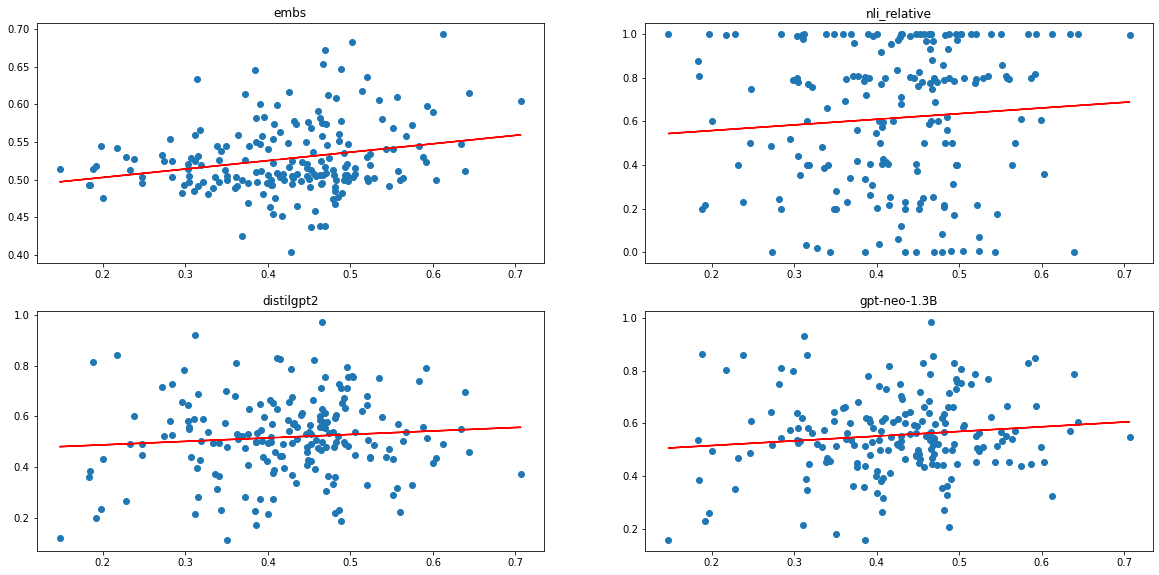

In [11]:
plt.figure(figsize=(20, 15))

for id, approach in enumerate(approaches):
    y_pred = [np.mean(e) for e in preds[approach]]

    theta = np.polyfit(mean_dists, y_pred, 1)
    y_line = theta[1] + theta[0] * np.array(mean_dists)

    plt.subplot(3, 2, id + 1)
    plt.title(approach)
    plt.plot(mean_dists, y_line, 'r')

    plt.subplot(3, 2, id + 1)
    plt.title(approach)
    plt.scatter(mean_dists, y_pred)